In [61]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [14]:
stock_symbol = "^GSPC"
start_date = "2022-01-01"
end_date = "2022-01-31"
df = yf.download(stock_symbol)

[*********************100%%**********************]  1 of 1 completed


In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


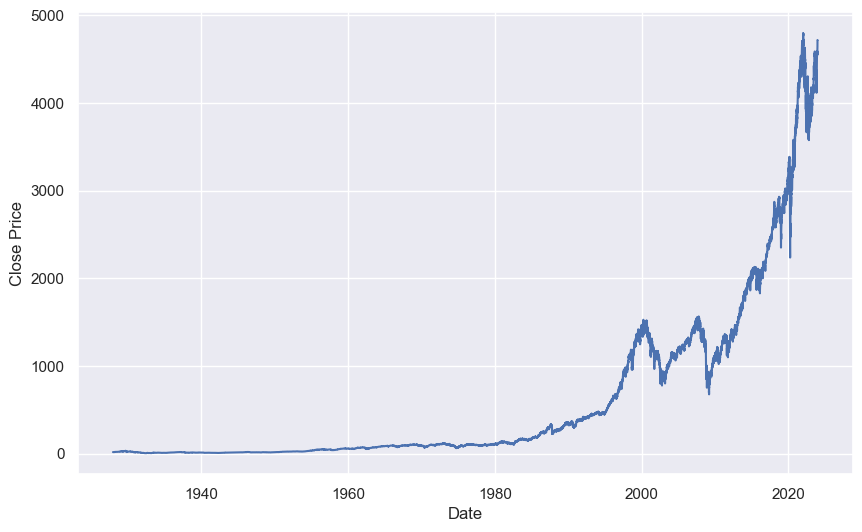

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df["Close"])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

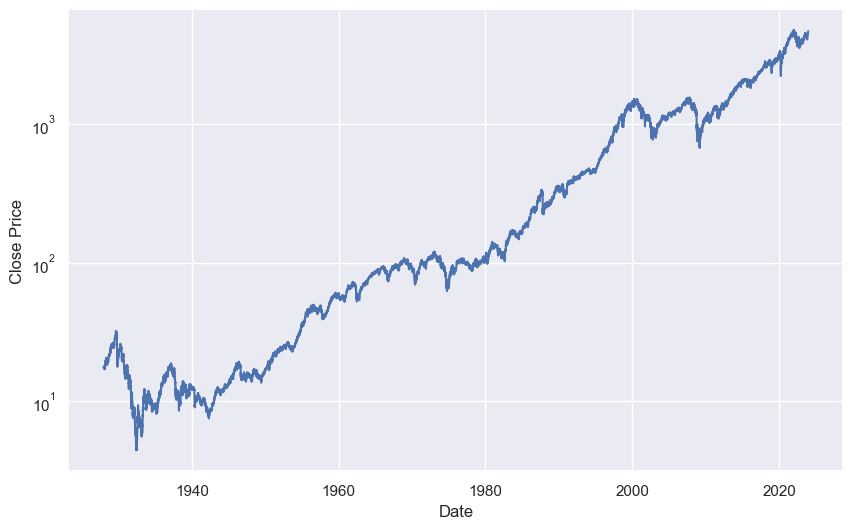

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df["Close"])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.yscale('log')
plt.show()

### Temporal patterns

#### Update dataset

In [32]:
df_tp = df.copy()
df_tp["Year"] = df.index.year
df_tp["Month"] = df.index.month
df_tp["Day"] = df.index.day

In [34]:
df_tp.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927,12,30
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928,1,3
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928,1,4
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928,1,5
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928,1,6


#### Day

Find seasonality in wednesdays

In [75]:
from datetime import datetime, timedelta

def find_first_wednesday(year, month):
    # Create a datetime object for the first day of the month
    first_day_of_month = datetime(year, month, 1)
    
    # Find the difference between the day of the week and Wednesday (2)
    days_until_wednesday = (7 + 2 - first_day_of_month.weekday()) % 7
    
    # Calculate the date of the first Wednesday
    first_wednesday = first_day_of_month + timedelta(days=days_until_wednesday)
    
    return first_wednesday

def get_all_wednesdays(year, month):
    first_wednesday = find_first_wednesday(year, month)
    current_day = first_wednesday
    while current_day.month == month:
        yield current_day
        current_day += timedelta(weeks=1)

In [97]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 5))
year = 2022
for month in range(1, 3):
    all_wednesdays = get_all_wednesdays(year, month)
    for i, row in df_tp[(df_tp["Year"] == year) & (df_tp["Month"] == month)].iterrows():
        # tmp = df_tp[(df_tp["Year"] == year) & (df_tp["Month"] == month) & (df_tp["Day"] == wednesday.day)]
        perc_change = row["Open"] / row["Close"]
        plt.scatter(row.index.dayofyear, perc_change, label=str(row["Day"]) + "." + str(row["Month"]), color=colors[row.index.weekday()])
    
plt.xlabel('Date')
plt.ylabel('Close Price')
#plt.yscale("log")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3328545208.py, line 10)

#### Month

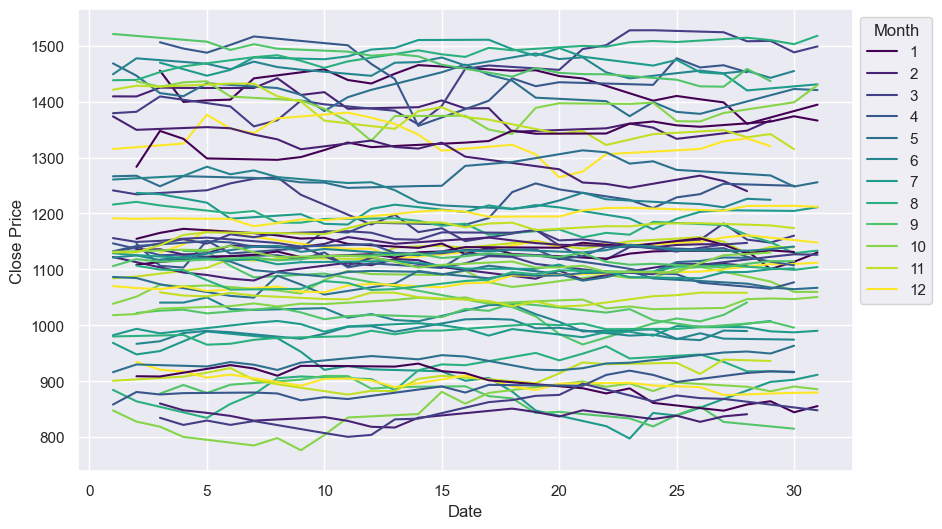

In [72]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 12))
legend_added = False
for year in range(2000, 2005):
    for month, color in zip(range(1, 13), colors):
        tmp = df_tp[(df_tp["Year"] == year) & (df_tp["Month"] == month)]
        plt.plot(tmp.index.day, tmp["Close"], label=str(month), color=color)
    
    if not legend_added:
        plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))
        legend_added = True
    
plt.xlabel('Date')
plt.ylabel('Close Price')
#plt.yscale("log")

plt.show()

#### Year

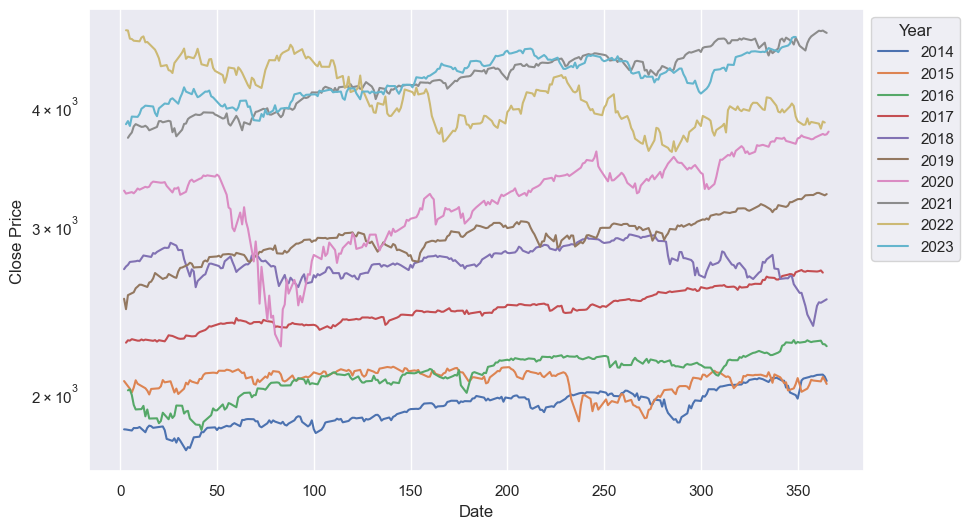

In [54]:
plt.figure(figsize=(10, 6))
for year in df_tp["Year"].unique()[-10:]:
    tmp = df_tp[df_tp["Year"] == year]
    plt.plot(tmp.index.dayofyear, tmp["Close"], label=str(year))
    
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.yscale("log")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()